<a href="https://colab.research.google.com/github/Nikhil5566/EDA-Repo/blob/main/Best_Seller_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('best_sellers_data2.csv')
df.head(11)

,product_title,product_price,product_star_rating,product_num_ratings,rank,country
0,"TurboTax Deluxe 2024 Tax Software, Federal & S...",$55.99,4.2,6511.0,1,US
1,"TurboTax Premier 2024 Tax Software, Federal & ...",$82.99,4.1,2738.0,2,US
2,"TurboTax Home & Business 2024 Tax Software, Fe...",$95.99,4.2,1672.0,3,US
3,"TurboTax Business 2024 Tax Software, Federal T...",$143.99,4.0,389.0,4,US
4,H&R Block Tax Software Deluxe + State 2024 wit...,$49.97,3.9,1683.0,5,US
5,"TurboTax Deluxe 2024 Tax Software, Federal Tax...",$47.99,4.1,1416.0,6,US
6,Microsoft Office Home 2024 | Classic Apps: Wor...,$140.99,3.8,470.0,7,US
7,H&R Block Tax Software Deluxe 2024 Win/Mac wit...,$41.97,4.0,312.0,8,US
8,H&R Block Tax Software Premium 2024 Win/Mac wi...,$72.99,3.9,272.0,9,US
9,iFit Train - Monthly Membership,$15.00,3.5,598.0,10,US


In [3]:
df.tail(11)

,product_title,product_price,product_star_rating,product_num_ratings,rank,country
2412,Datacolor Spyder Print: Complete oplossingen v...,"€ 299,00",NaN,NaN,90,NL
2413,DIY 5D Diamond Painting Kits voor Volwassenen ...,"€ 11,99",NaN,NaN,91,NL
2414,"DJ TechTools 05-30125 Chroma Cable USB-C, Hoog...","€ 32,45",5.0,20.0,92,NL
2415,"AVG TuneUp 2025 - Maak uw pc sneller, schoon d...","€ 21,99",3.8,70.0,93,NL
2416,AVG Internet Security 2025 - Geavanceerde anti...,"€ 28,99",3.5,29.0,94,NL
2417,"Norton 360 Standard 2024, antivirussoftware, i...","€ 17,95",NaN,NaN,95,NL
2418,ġAFENOㅀ ŗecεiveㅀ]Sangle Mascarade Šèxy Tòy Lês...,"€ 22,99",NaN,NaN,96,NL
2419,Poser 12 | The Premier 3D Rendering & Animatio...,"€ 52,98",3.6,29.0,97,NL
2420,LYHM DIY 5D Diamond Painting Kits voor Volwass...,"€ 11,99",5.0,1.0,98,NL
2421,Nero Platinum 2019 Box|Platinum|1|One time|PC|...,NaN,4.4,219.0,99,NL


In [4]:
df.shape

(2423, 6)

In [8]:
df.columns

Index(['product_title', 'product_price', 'product_star_rating',
       'product_num_ratings', 'rank', 'country'],
      dtype='object')

In [6]:
df.dtypes

,0
product_title,object
product_price,object
product_star_rating,float64
product_num_ratings,float64
rank,int64
country,object


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2423 entries, 0 to 2422
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_title        2423 non-null   object 
 1   product_price        2158 non-null   object 
 2   product_star_rating  2270 non-null   float64
 3   product_num_ratings  2066 non-null   float64
 4   rank                 2423 non-null   int64  
 5   country              2423 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 113.7+ KB


In [10]:
df.isnull().sum()

,0
product_title,0
product_price,265
product_star_rating,153
product_num_ratings,357
rank,0
country,0


In [11]:
df.duplicated().sum()

np.int64(832)

In [12]:
# Clean the 'product_price' column: remove any non-numeric characters (like $ and commas) and convert to float:
# This step is often necessary when the data type is not as expected:

df['product_price'] = df['product_price'].replace({'\$': '', ',': ''}, regex=True)
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')

In [13]:
# Depending on the situation, we could choose to impute missing values; here, we'll drop rows with missing critical values:

df.dropna(subset=['product_price', 'product_star_rating', 'product_num_ratings'], inplace=True)

In [14]:
# Reset index after dropping rows:

df.reset_index(drop=True, inplace=True)

In [15]:
# Confirm data types and handle categorical variables if needed:

df['rank'] = df['rank'].astype(int)
df['country'] = df['country'].astype('category')

In [16]:
# Post cleaning data info:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   product_title        616 non-null    object  
 1   product_price        616 non-null    float64 
 2   product_star_rating  616 non-null    float64 
 3   product_num_ratings  616 non-null    float64 
 4   rank                 616 non-null    int64   
 5   country              616 non-null    category
dtypes: category(1), float64(3), int64(1), object(1)
memory usage: 25.0+ KB


# Visualization

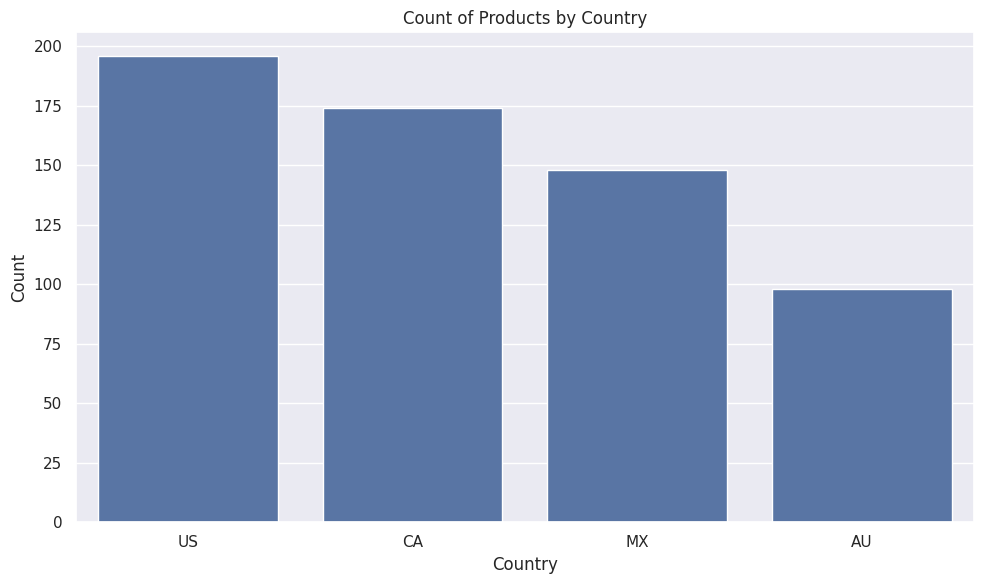

In [18]:
# 1. Count plot: Distribution of products by country

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index)
plt.title('Count of Products by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

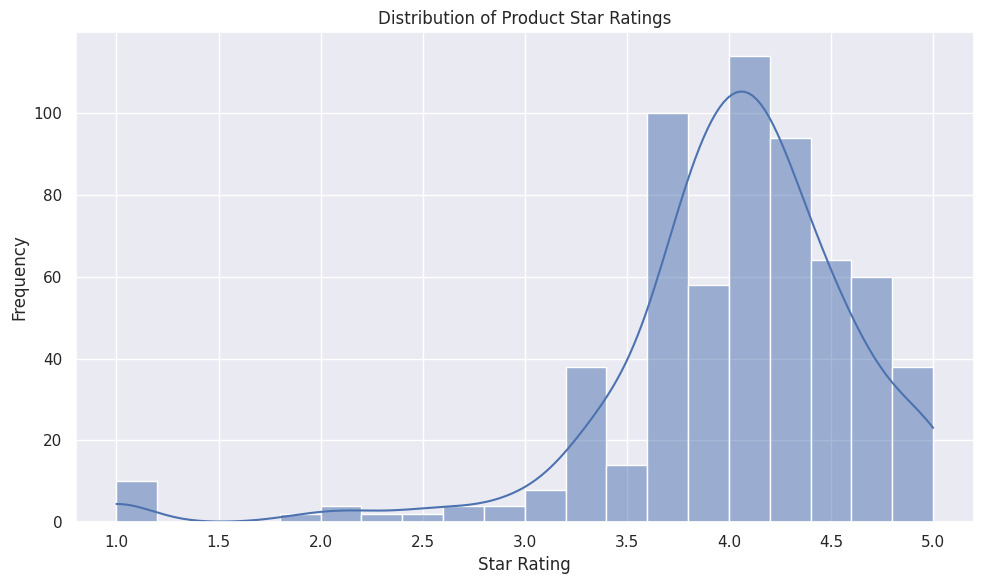

In [20]:
# 2. Histogram: Distribution of product star ratings

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='product_star_rating', bins=20, kde=True)
plt.title('Distribution of Product Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

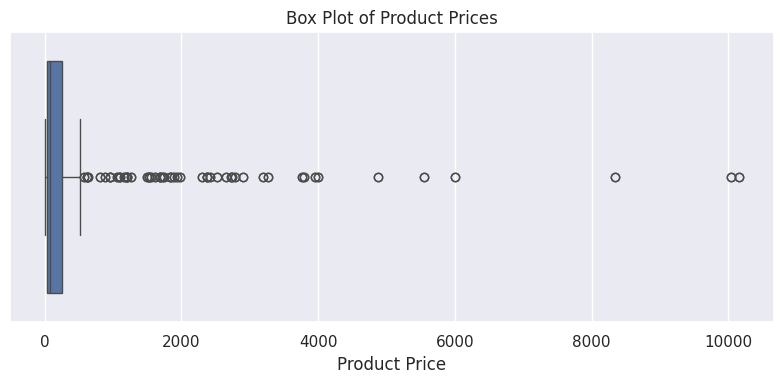

In [21]:
# 3. Box Plot: Product Price distribution to identify outliers

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['product_price'])
plt.title('Box Plot of Product Prices')
plt.xlabel('Product Price')
plt.tight_layout()
plt.show()

In [23]:
# Thank you